In [3]:
import pandas as pd

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib
from matplotlib import pyplot as plt

import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_230826 = pd.read_csv('neut_data/230826_3944-2365_neuts_tidy.csv')

In [6]:
virus_dict = {
    'HK19_wt': 'WT',
}

data_230826 = data_230826.replace({'virus': virus_dict})

In [7]:
virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data_230826['virus'] = pd.Categorical(data_230826.virus, categories=virus_order, ordered=True)
data_230826.sort_values('virus')

,serum,virus,replicate,concentration,fraction infectivity
0,3944,WT,1,0.012500,0.008535
26,2365,WT,1,0.006250,0.004185
27,2365,WT,1,0.003125,0.002106
28,2365,WT,1,0.001563,0.031737
29,2365,WT,1,0.000781,0.182333
...,...,...,...,...,...
398,3944,S145K,2,0.000195,1.065389
399,3944,S145K,2,0.000098,1.171229
400,3944,S145K,2,0.000049,1.046134
402,3944,S145K,2,0.000012,0.644709


In [8]:

data_230826 = data_230826.set_index('virus').loc[virus_order].reset_index()

In [10]:
# fit with neutcurve package
fits = neutcurve.CurveFits(data_230826)

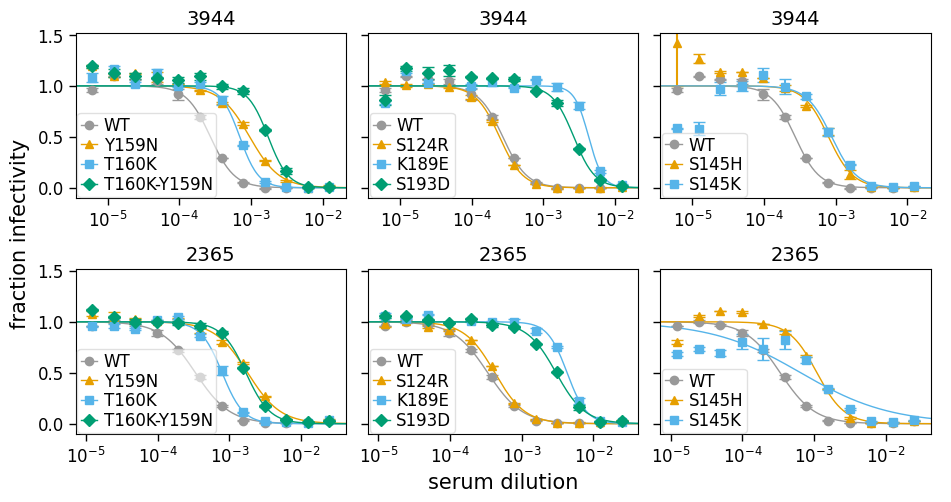

In [18]:
fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
plt.savefig('230826_3944-2365_validations.pdf', bbox_inches=bbox)

In [26]:
data_230909 = pd.read_csv('neut_data/230909_neuts_tidy.csv')

In [27]:
virus_dict = {
    'HK19_wt': 'WT',
}

data_230909 = data_230909.replace({'virus': virus_dict})

In [28]:
virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data_230909['virus'] = pd.Categorical(data_230909.virus, categories=virus_order, ordered=True)
data_230909.sort_values('virus')

,serum,virus,replicate,concentration,fraction infectivity
0,3944,WT,1,0.012500,0.018041
26,2365,WT,1,0.006250,0.018132
27,2365,WT,1,0.003125,0.012345
28,2365,WT,1,0.001563,0.009187
29,2365,WT,1,0.000781,0.110931
...,...,...,...,...,...
402,3944,S145K,2,0.000195,0.226541
403,3944,S145K,2,0.000098,0.299519
404,3944,S145K,2,0.000049,0.216518
406,3944,S145K,2,0.000012,0.277153


In [29]:

data_230909 = data_230909.set_index('virus').loc[virus_order].reset_index()

In [30]:
data_230909 = data_230909.loc[data_230909['virus'] != 'S145K']

# fit with neutcurve package
fits = neutcurve.CurveFits(data_230909)

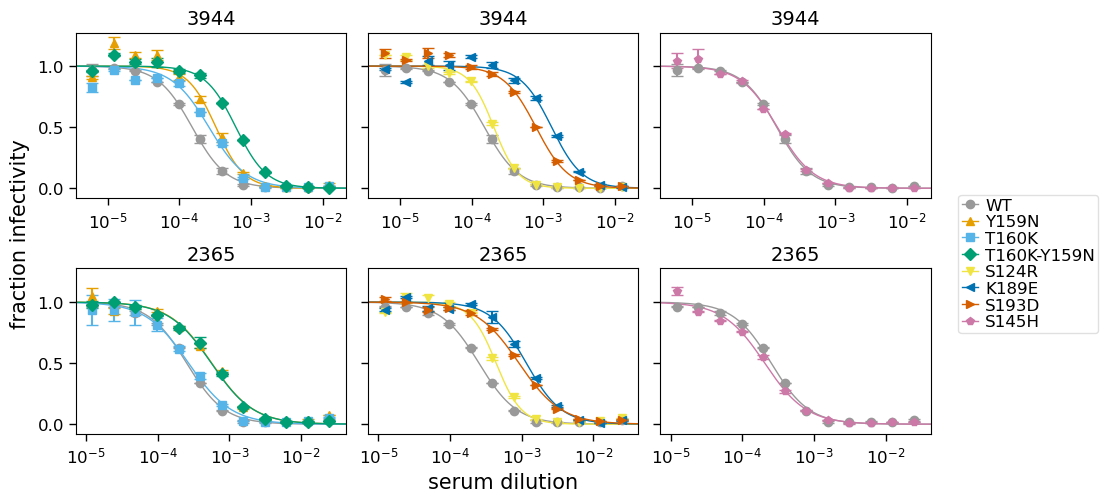

In [31]:
fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
# plt.savefig('230909_3944-2365_validations.pdf', bbox_inches=bbox)

In [25]:
data_230923 = pd.read_csv('neut_data/230923_neuts_tidy.csv')

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data_230923['virus'] = pd.Categorical(data_230923.virus, categories=virus_order, ordered=True)
data_230923.sort_values('virus')

data_230923 = data_230923.set_index('virus').loc[virus_order].reset_index()

data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']
# data_230923 = data_230923.loc[data_230923['serum'] == '3944']

# data_230923 = data_230923.loc[data_230923['concentration'] < 0.003]
data_230923 = data_230923.loc[data_230923['concentration'] > 0.00002]

# fit with neutcurve package
fits = neutcurve.CurveFits(data_230923)

In [40]:
serum_ic50 = fits.fitParams(ics=[50])
WT_IC50 = serum_ic50.loc[serum_ic50["virus"] == "WT"]['ic50'][0]
WT_IC50

0.00015110698448812687

In [42]:
# Initialize an empty DataFrame to store the results
fold_changes = pd.DataFrame()

# Iterate through unique serum names
for serum_name in serum_ic50['serum'].unique():
    # Filter data for the current serum
    serum_data = serum_ic50[serum_ic50['serum'] == serum_name]
    
    # Find the 'WT' IC50 value for the current serum
    wt_ic50 = serum_data[serum_data['virus'] == 'WT']['ic50'].values[0]
    
    # Filter out the 'WT' rows for the current serum
    variant_data = serum_data[serum_data['virus'] != 'WT'].copy()
    
    # Calculate log2 fold changes for the current serum
    variant_data['log2_fold_change_ic50'] = np.log2(variant_data['ic50'] / wt_ic50)
    
    # Append the results to the fold_changes DataFrame
    fold_changes = pd.concat([fold_changes, variant_data[['serum', 'virus', 'ic50', 'log2_fold_change_ic50']]])

# Reset the index of the final DataFrame
fold_changes = fold_changes.reset_index(drop=True)

# Rename the 'virus' column to 'variant'
fold_changes = fold_changes.rename(columns={'virus': 'variant'})

# Display the result
fold_changes.to_csv('230909_3944-2365_fold_changes.csv', index=False)

In [12]:
# Filter out the 'WT' rows
fold_changes = serum_ic50[serum_ic50['virus'] != 'WT']

# Calculate log2 fold changes for each variant
wt_ic50 = serum_ic50[serum_ic50['virus'] == 'WT']['ic50'][0]
fold_changes['log2_fold_change_ic50'] = np.log2(fold_changes['ic50'] / wt_ic50)

# Rename columns and reset index
fold_changes = fold_changes.rename(columns={'virus': 'variant'})
fold_changes = fold_changes[['serum', 'variant', 'ic50', 'log2_fold_change_ic50']].reset_index(drop=True)

# Display the result
fold_changes

,serum,variant,ic50,log2_fold_change_ic50
0,3944,Y159N,0.000322,1.291687
1,3944,T160K,0.000224,0.768309
2,3944,T160K-Y159N,0.000537,2.028568
3,3944,S124R,0.000303,1.202617
4,3944,K189E,0.001498,3.508816
5,3944,S193D,0.000897,2.769804
6,3944,S145K,0.000248,0.915932


In [7]:
serum_ic50

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,midpoint,slope,top,bottom
0,3944,WT,average,2,0.000132,interpolated,0.000132,0.000132,1.866146,1,0
1,3944,Y159N,average,2,0.000322,interpolated,0.000322,0.000322,1.826488,1,0
2,3944,T160K,average,2,0.000224,interpolated,0.000224,0.000224,2.860880,1,0
3,3944,T160K-Y159N,average,2,0.000537,interpolated,0.000537,0.000537,2.273144,1,0
4,3944,S124R,average,2,0.000303,interpolated,0.000303,0.000303,3.092776,1,0
5,3944,K189E,average,2,0.001498,interpolated,0.0015,0.001498,2.105130,1,0
6,3944,S193D,average,2,0.000897,interpolated,0.000897,0.000897,1.793350,1,0
7,3944,S145K,average,2,0.000248,interpolated,0.000248,0.000248,2.267622,1,0


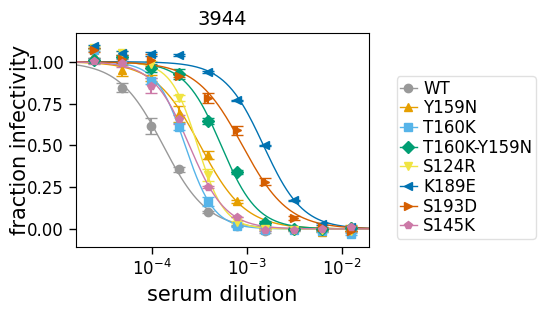

In [55]:
fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=8,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [5.5, 3.2]])
plt.savefig('230923_3944_validations_full.pdf', bbox_inches=bbox)

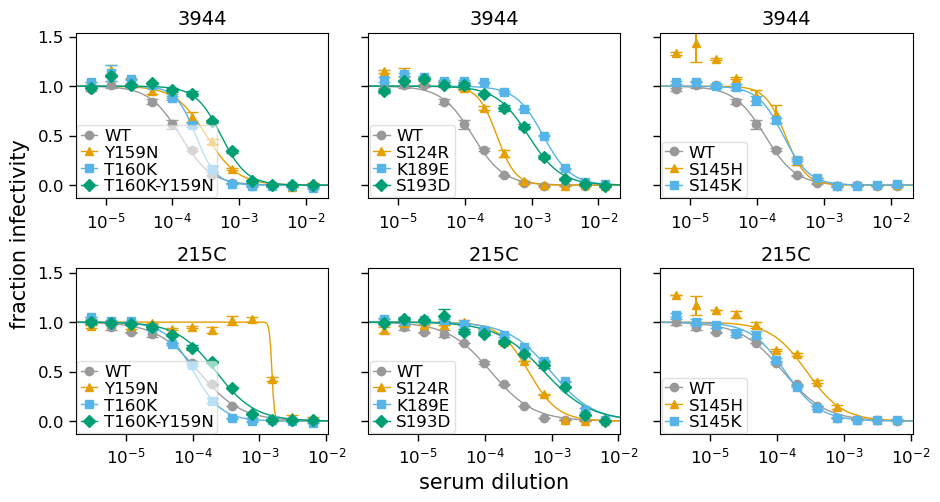

In [33]:
data_230923 = pd.read_csv('neut_data/230923_neuts_tidy.csv')

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data_230923['virus'] = pd.Categorical(data_230923.virus, categories=virus_order, ordered=True)
data_230923.sort_values('virus')

data_230923 = data_230923.set_index('virus').loc[virus_order].reset_index()

# data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']

# fit with neutcurve package
fits = neutcurve.CurveFits(data_230923)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
# plt.savefig('230923_3944-215C_validations.pdf', bbox_inches=bbox)

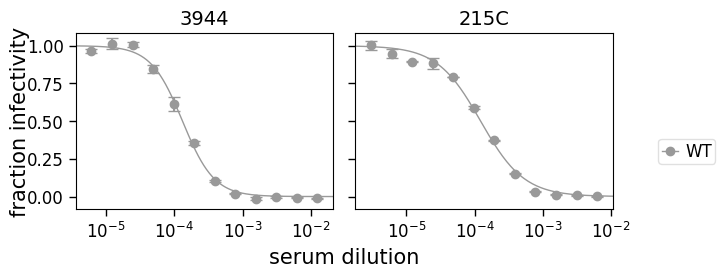

In [7]:
data_230923 = data_230923.loc[data_230923['virus'] == 'WT']

# fit with neutcurve package
fits = neutcurve.CurveFits(data_230923)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

In [19]:
serum_ic50 = fits.fitParams(ics=[50])
serum_ic50

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,midpoint,slope,top,bottom
0,3944,WT,average,2,0.000131,interpolated,0.000131,0.000131,1.822180,1,0
1,3944,Y159N,average,2,0.000323,interpolated,0.000323,0.000323,1.850382,1,0
2,3944,T160K,average,2,0.000224,interpolated,0.000224,0.000224,2.868076,1,0
3,3944,T160K-Y159N,average,2,0.000537,interpolated,0.000537,0.000537,2.275446,1,0
4,3944,S124R,average,2,0.000303,interpolated,0.000303,0.000303,3.094712,1,0
5,3944,K189E,average,2,0.001498,interpolated,0.0015,0.001498,2.105829,1,0
6,3944,S193D,average,2,0.000897,interpolated,0.000897,0.000897,1.794576,1,0
7,3944,S145H,average,2,0.000267,interpolated,0.000267,0.000267,2.905407,1,0
8,3944,S145K,average,2,0.000248,interpolated,0.000248,0.000248,2.273878,1,0
9,215C,WT,average,2,0.000129,interpolated,0.000129,0.000129,1.426038,1,0


In [4]:
data = pd.read_csv('neut_data/230926_moi-curves-tidy_test.csv')
data_2 = data.copy()
data_2['replicate'] = 2
data_final = pd.concat([data, data_2])

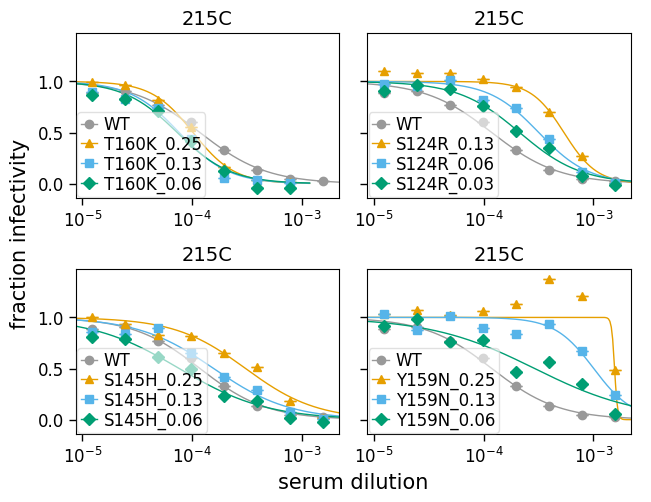

In [16]:
data = pd.read_csv('neut_data/230926_moi-curves-tidy_test.csv')
data_2 = data.copy()
data_2['replicate'] = 2
data = pd.concat([data, data_2])

data = data.loc[data['serum'] != '3944']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [7.5, 5.5]])
plt.savefig('230926_moi-curves.pdf', bbox_inches=bbox)

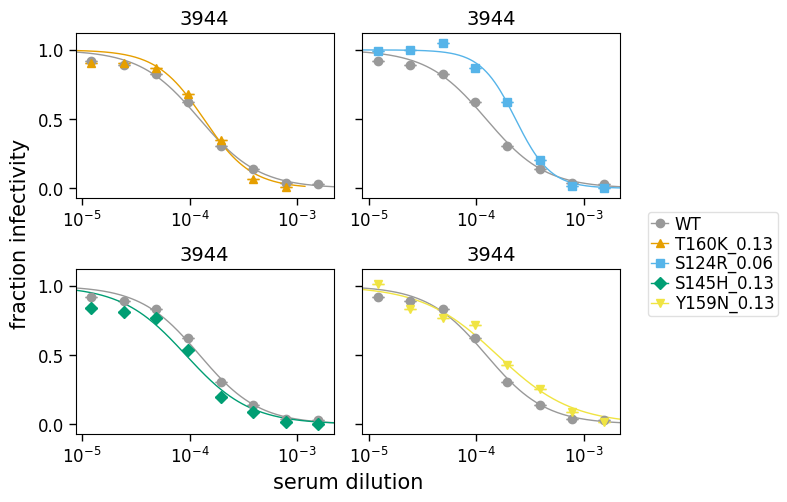

In [24]:
data = pd.read_csv('neut_data/230926_moi-curves-tidy_test.csv')
data_2 = data.copy()
data_2['replicate'] = 2
data = pd.concat([data, data_2])

data = data.loc[data['serum'] != '215C']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=2,
                          ncol=2,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [9, 5.5]])
plt.savefig('230926_moi-curves_3944.pdf', bbox_inches=bbox)

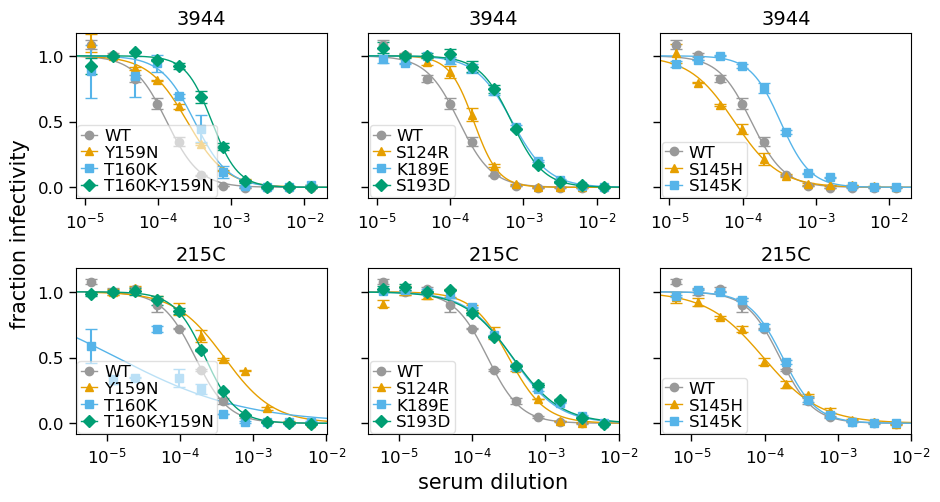

In [27]:
data = pd.read_csv('neut_data/231012_neuts-tidy.csv')

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
plt.savefig('231012_3944-215C_validations.pdf', bbox_inches=bbox)

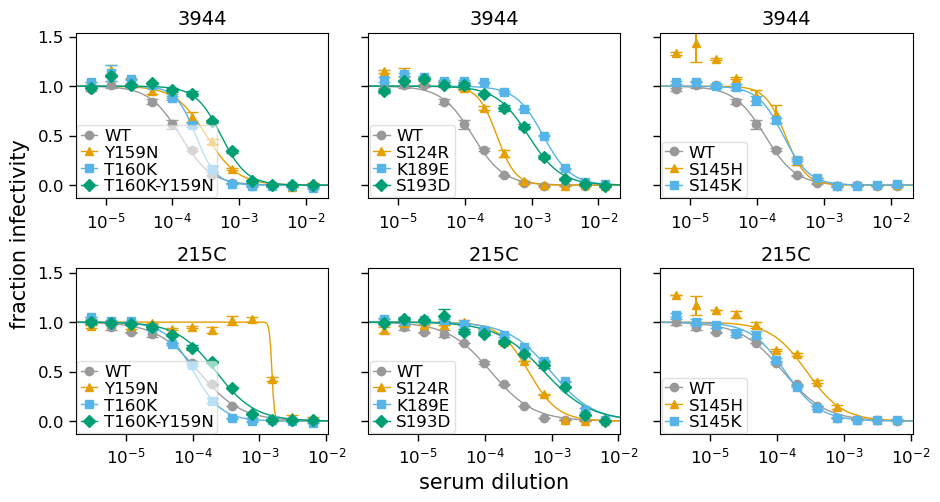

In [24]:
data_230923 = pd.read_csv('neut_data/230923_neuts_tidy.csv')

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'S124R', 'K189E', 'S193D', 
               'S145H', 'S145K']

data_230923['virus'] = pd.Categorical(data_230923.virus, categories=virus_order, ordered=True)
data_230923.sort_values('virus')

data_230923 = data_230923.set_index('virus').loc[virus_order].reset_index()

# data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']

# fit with neutcurve package
fits = neutcurve.CurveFits(data_230923)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [10.5, 6]])
# plt.savefig('230923_3944-215C_validations.pdf', bbox_inches=bbox)

In [20]:
serum_ic50

,serum,virus,replicate,nreplicates,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom
0,3944,WT,average,2,0.000411,interpolated,0.000411,0.000132,1.932513,1,0
1,3944,Y159N,average,2,0.000965,interpolated,0.000965,0.000252,1.635099,1,0
2,3944,T160K,average,2,0.001007,interpolated,0.00101,0.000316,1.898357,1,0
3,3944,T160K-Y159N,average,2,0.001338,interpolated,0.00134,0.000544,2.443487,1,0
4,3944,S124R,average,2,0.000490,interpolated,0.00049,0.000210,2.593867,1,0
5,3944,K189E,average,2,0.002471,interpolated,0.00247,0.000701,1.744525,1,0
6,3944,S193D,average,2,0.002082,interpolated,0.00208,0.000689,1.987273,1,0
7,3944,S145H,average,2,0.000364,interpolated,0.000364,0.000077,1.416551,1,0
8,3944,S145K,average,2,0.000926,interpolated,0.000926,0.000329,2.126415,1,0
9,215C,WT,average,2,0.000511,interpolated,0.000511,0.000162,1.911817,1,0


In [28]:
serum_ic50 = fits.fitParams(ics=[90])
# WT_IC50 = serum_ic50.loc[serum_ic50["virus"] == "WT"]['ic50'][0]
# WT_IC50

In [29]:
# Initialize an empty DataFrame to store the results
fold_changes = pd.DataFrame()

# Iterate through unique serum names
for serum_name in serum_ic50['serum'].unique():
    # Filter data for the current serum
    serum_data = serum_ic50[serum_ic50['serum'] == serum_name]
    
#     # Find the 'WT' IC50 value for the current serum
#     wt_ic50 = serum_data[serum_data['virus'] == 'WT']['ic50'].values[0]
    
    # Filter out the 'WT' rows for the current serum
    # variant_data = serum_data[serum_data['virus'] != 'WT'].copy()
    
#     # Calculate log2 fold changes for the current serum
#     variant_data['log2_fold_change_ic50'] = np.log2(variant_data['ic50'] / wt_ic50)
    
    # Append the results to the fold_changes DataFrame
    fold_changes = pd.concat([fold_changes, variant_data[['serum', 'virus', 'ic90', ]]])

# Reset the index of the final DataFrame
fold_changes = fold_changes.reset_index(drop=True)

# Rename the 'virus' column to 'variant'
fold_changes = fold_changes.rename(columns={'virus': 'variant'})

# Display the result
fold_changes.to_csv('231012_ic90.csv', index=False)

In [22]:
fold_changes

,serum,variant,ic90
0,3944,Y159N,0.000965
1,3944,T160K,0.001007
2,3944,T160K-Y159N,0.001338
3,3944,S124R,0.000490
4,3944,K189E,0.002471
5,3944,S193D,0.002082
6,3944,S145H,0.000364
7,3944,S145K,0.000926
8,215C,Y159N,0.002207
9,215C,T160K,0.001199


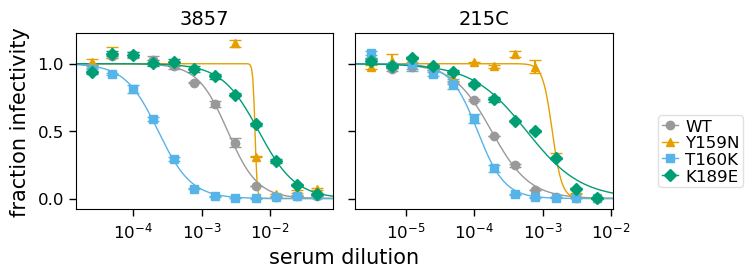

In [24]:
data = pd.read_csv('neut_data/231018_neuts-tidy.csv')

virus_order = ['WT', 'Y159N', 'T160K', 'K189E']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [9, 3.2]])
plt.savefig('231018_38574-215C_test.pdf', bbox_inches=bbox)

In [16]:
serum_ic50 = fits.fitParams(ics=[80])

# Initialize an empty DataFrame to store the results
fold_changes = pd.DataFrame()

# Iterate through unique serum names
for serum_name in serum_ic50['serum'].unique():
    # Filter data for the current serum
    serum_data = serum_ic50[serum_ic50['serum'] == serum_name]
    
#     # Find the 'WT' IC50 value for the current serum
#     wt_ic50 = serum_data[serum_data['virus'] == 'WT']['ic50'].values[0]
    
    # Filter out the 'WT' rows for the current serum
    # variant_data = serum_data[serum_data['virus'] != 'WT'].copy()
    
#     # Calculate log2 fold changes for the current serum
#     variant_data['log2_fold_change_ic50'] = np.log2(variant_data['ic50'] / wt_ic50)
    
    # Append the results to the fold_changes DataFrame
    fold_changes = pd.concat([fold_changes, serum_data[['serum', 'virus', 'ic80', ]]])

# Reset the index of the final DataFrame
fold_changes = fold_changes.reset_index(drop=True)

# Rename the 'virus' column to 'variant'
fold_changes = fold_changes.rename(columns={'virus': 'variant'})

# Display the result
fold_changes.to_csv('2365_ic80.csv', index=False)

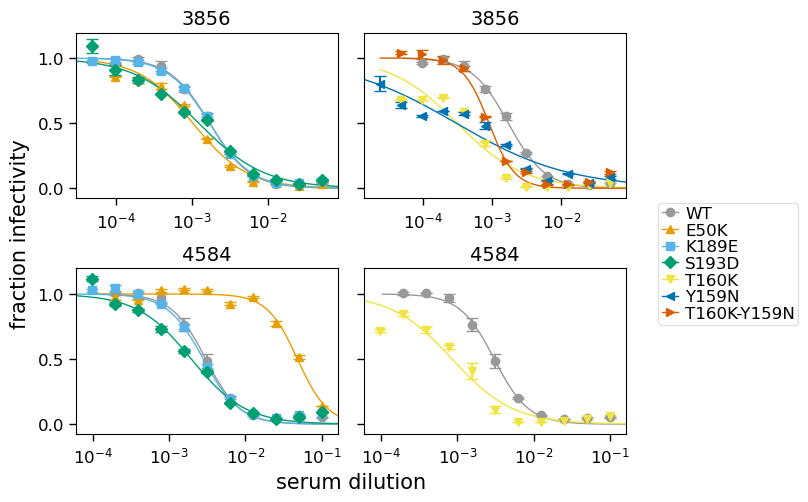

In [3]:
data = pd.read_csv('neut_data/231021_3856-4584_tidy.csv')

virus_order = ['WT', 'E50K', 'K189E', 'S193D', 'T160K', 'Y159N', 'T160K-Y159N']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [9, 3.2]])
# plt.savefig('231018_38574-215C_test.pdf', bbox_inches=bbox)

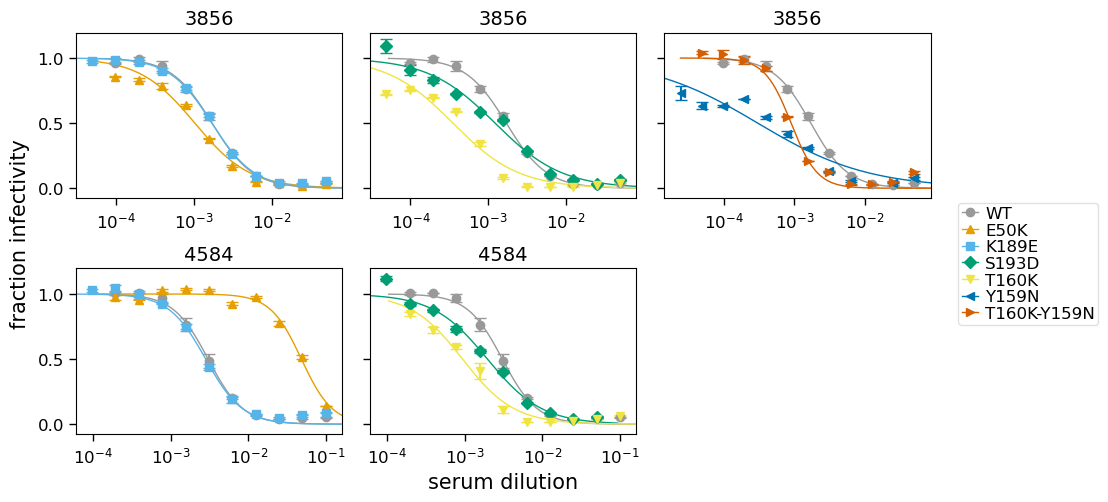

In [11]:
data = pd.read_csv('neut_data/231021_3856-4584_tidy.csv')

virus_order = ['WT', 'E50K', 'K189E', 'S193D', 'T160K', 'Y159N', 'T160K-Y159N']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=3,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [9, 3.2]])
# plt.savefig('231018_38574-215C_test.pdf', bbox_inches=bbox)

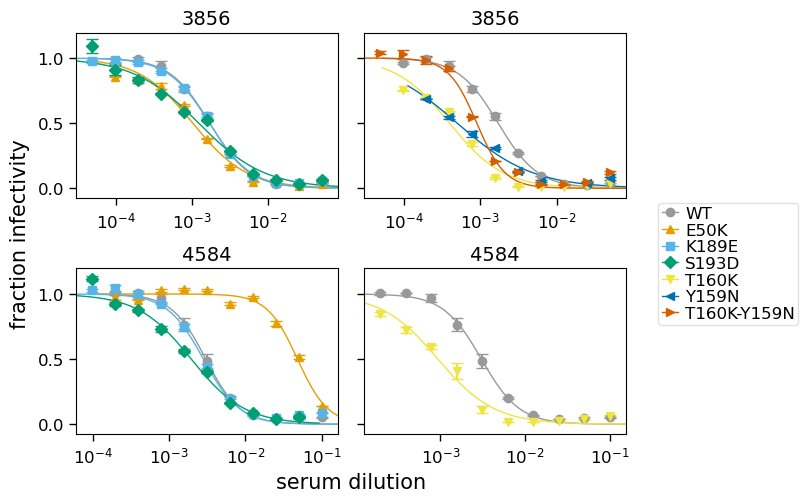

In [54]:
data = pd.read_csv('neut_data/231021_3856-4584_tidy.csv')

virus_order = ['WT', 'E50K', 'K189E', 'S193D', 'T160K', 'Y159N', 'T160K-Y159N']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# data_230923 = data_230923.loc[data_230923['virus'] != 'S145H']

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [9, 6]])
# plt.savefig('231021_3856-4584.pdf', bbox_inches=bbox)

In [38]:
serum_ic50 = fits.fitParams(ics=[80])

# Initialize an empty DataFrame to store the results
fold_changes = pd.DataFrame()

# Iterate through unique serum names
for serum_name in serum_ic50['serum'].unique():
    # Filter data for the current serum
    serum_data = serum_ic50[serum_ic50['serum'] == serum_name]
    
    # Find the 'WT' IC50 value for the current serum
    wt_ic50 = serum_data[serum_data['virus'] == 'WT']['ic80'].values[0]
    
    # Filter out the 'WT' rows for the current serum
    variant_data = serum_data[serum_data['virus'] != 'WT'].copy()
    
    # Calculate log2 fold changes for the current serum
    variant_data['log2_fold_change_ic80'] = np.log2(variant_data['ic80'] / wt_ic50)
    
    # Append the results to the fold_changes DataFrame
    fold_changes = pd.concat([fold_changes, variant_data[['serum', 'virus', 'log2_fold_change_ic80', ]]])

# Reset the index of the final DataFrame
fold_changes = fold_changes.reset_index(drop=True)

# Rename the 'virus' column to 'variant'
fold_changes = fold_changes.rename(columns={'virus': 'variant'})

# Display the result
fold_changes.to_csv('3944_fold-change_final.csv', index=False)

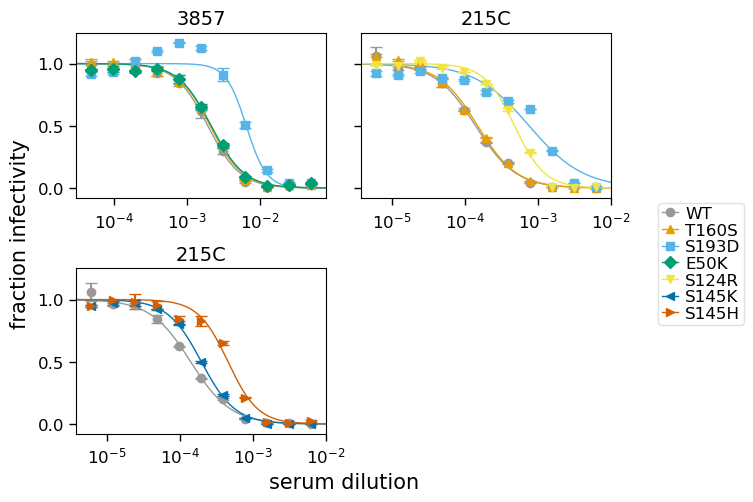

In [56]:
data = pd.read_csv('neut_data/231023_neuts_tidy.csv')

# virus_order = ['WT', 'E50K', 'K189E', 'S193D', 'T160K', 'Y159N', 'T160K-Y159N']

# data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
# data.sort_values('virus')

# data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [9, 6]])
# plt.savefig('231021_3856-4584.pdf', bbox_inches=bbox)

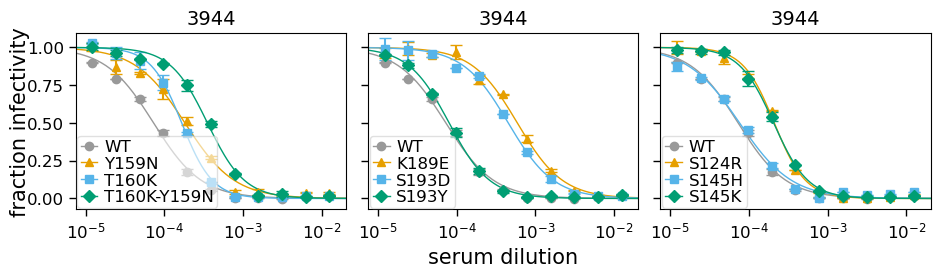

In [2]:
data = pd.read_csv('neut_data/231027_neuts-tidy.csv')
data = data[data['concentration'] > 1e-5]
# data = data[data['

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'K189E', 'S193D', 'S193Y', 'S124R', 'S145H', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [10, 3.2]])
plt.savefig('231027_3944.pdf', bbox_inches=bbox)

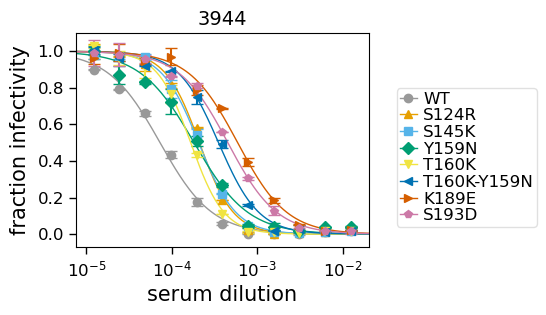

In [45]:
data_filt = data[data['virus'].isin(['WT', 'S124R', 'S145K', 'Y159N', 'T160K', 'T160K-Y159N', 'K189E', 'S193D'])]

virus_order = ['WT', 'S124R', 'S145K', 'Y159N', 'T160K', 'T160K-Y159N', 'K189E', 'S193D']

data_filt['virus'] = pd.Categorical(data_filt.virus, categories=virus_order, ordered=True)
data_filt.sort_values('virus')

data_filt = data_filt.set_index('virus').loc[virus_order].reset_index()


# fit with neutcurve package
fits = neutcurve.CurveFits(data_filt)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=8,
                          ncol=2,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [9, 6]])
# plt.savefig('231021_3856-4584.pdf', bbox_inches=bbox)

In [7]:
serum_ic50 = fits.fitParams(ics=[80])

# Initialize an empty DataFrame to store the results
fold_changes = pd.DataFrame()

# Iterate through unique serum names
for serum_name in serum_ic50['serum'].unique():
    # Filter data for the current serum
    serum_data = serum_ic50[serum_ic50['serum'] == serum_name]
    
    # Find the 'WT' IC50 value for the current serum
    wt_ic50 = serum_data[serum_data['virus'] == 'WT']['ic80'].values[0]
    
    # Filter out the 'WT' rows for the current serum
    variant_data = serum_data[serum_data['virus'] != 'WT'].copy()
    
    # Calculate log2 fold changes for the current serum
    variant_data['log2_fold_change_ic80'] = np.log2(variant_data['ic80'] / wt_ic50)
    
    # Append the results to the fold_changes DataFrame
    fold_changes = pd.concat([fold_changes, variant_data[['serum', 'virus', 'log2_fold_change_ic80', ]]])

# Reset the index of the final DataFrame
fold_changes = fold_changes.reset_index(drop=True)

# Rename the 'virus' column to 'variant'
fold_changes = fold_changes.rename(columns={'virus': 'variant'})

# Display the result
fold_changes.to_csv('197C_74C_fold-change_final.csv', index=False)

In [57]:
def get_fold_changes(df, ic):
    # fit Hill Curve and get ICs
    fits = neutcurve.CurveFits(df)
    ic_df = fits.fitParams(ics=[ic])
    
    # Initialize an empty DataFrame to store the results
    fold_changes = pd.DataFrame()

    # Iterate through unique serum names
    for serum_name in ic_df['serum'].unique():
        # Filter data for the current serum
        serum_data = ic_df[ic_df['serum'] == serum_name]

        # Find the 'WT' ICX value for the current serum
        wt = serum_data[serum_data['virus'] == 'WT'][f'ic{ic}'].values[0]

        # Filter out the 'WT' rows for the current serum
        variant_data = serum_data[serum_data['virus'] != 'WT'].copy()

        # Calculate log2 fold changes for the current serum
        variant_data[f'log2_fold_change_ic{ic}'] = np.log2(variant_data[f'ic{ic}'] / wt)

        # Append the results to the fold_changes DataFrame
        fold_changes = pd.concat([fold_changes, variant_data[['serum', 'virus', f'log2_fold_change_ic{ic}']]])

    # Reset the index of the final DataFrame
    fold_changes = fold_changes.reset_index(drop=True)

    # Rename the 'virus' column to 'variant'
    fold_changes = fold_changes.rename(columns={'virus': 'variant'})

    return fold_changes

In [3]:
fits.fitParams(ics=[50])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,midpoint,slope,top,bottom
0,3944,WT,average,2,0.000073,interpolated,7.3e-05,0.000073,1.426702,1,0
1,3944,Y159N,average,2,0.000183,interpolated,0.000183,0.000183,1.381221,1,0
2,3944,T160K,average,2,0.000167,interpolated,0.000167,0.000167,2.220107,1,0
3,3944,T160K-Y159N,average,2,0.000353,interpolated,0.000353,0.000353,1.842794,1,0
4,3944,K189E,average,2,0.000591,interpolated,0.000591,0.000591,1.508718,1,0
5,3944,S193D,average,2,0.000453,interpolated,0.000453,0.000453,1.509635,1,0
6,3944,S193Y,average,2,0.000080,interpolated,8.05e-05,0.000080,1.679743,1,0
7,3944,S124R,average,2,0.000210,interpolated,0.00021,0.000210,2.181445,1,0
8,3944,S145H,average,2,0.000076,interpolated,7.62e-05,0.000076,1.312576,1,0
9,3944,S145K,average,2,0.000207,interpolated,0.000207,0.000207,1.991275,1,0


In [9]:
def get_ics(serum_neuts, ic):
    ic_df_list=[]
    
    for serum in serum_neuts:
        i=0
        for filename in serum_neuts[serum]:
            df = pd.read_csv(f'neut_data/{filename}.csv')
            df['serum'] = df['serum'].astype(str)
            df = df[df['serum'] == serum]

            # drop lowest conc for 3944 run
            if serum == '3944':
                df = df[df['concentration'] > 1e-5]
                
            fits = neutcurve.CurveFits(df)
            ic_df = fits.fitParams(ics=[ic])
            ic_df = ic_df.rename(columns={'virus': 'variant'})
            ic_df = ic_df[['serum', 'variant', f'ic{ic}']]
            
            di = {'HK19_wt': 'WT'}
            ic_df['variant'] = ic_df['variant'].map(di).fillna(ic_df['variant'])
            
            if i>0:
                WT_dict = {'WT': 'WT_2'}
                ic_df['variant'] = ic_df['variant'].map(WT_dict).fillna(ic_df['variant'])

            ic_df_list.append(ic_df)
            
            i+=1
    
    ic_df_full = pd.concat(ic_df_list)
 
    return ic_df_full

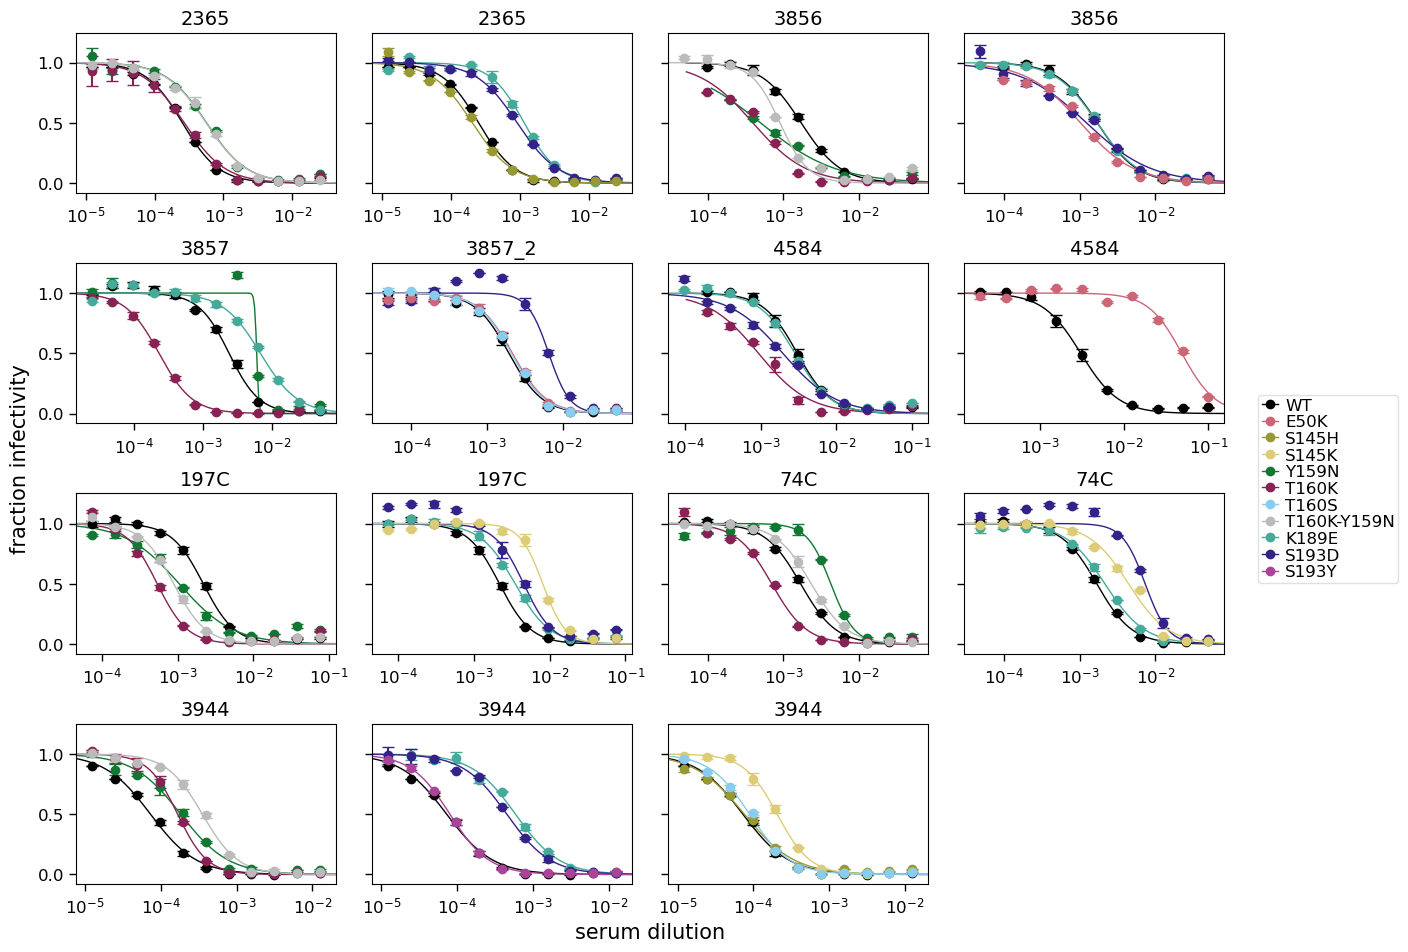

In [18]:
# make dict mapping serum to run:
serum_neuts = {
    '2365': ['230909_neuts_tidy'],
    '3857': ['231018_neuts-tidy', '231023_neuts_tidy'],
    '3856': ['231021_3856-4584_tidy'],
    '4584': ['231021_3856-4584_tidy'],
    '3944': ['231027_neuts-tidy'],
    '197C': ['231031_neuts_tidy'], 
    '74C': ['231031_neuts_tidy'], 
}

df_list = []

for serum in serum_neuts:
    i=0
    for filename in serum_neuts[serum]:
        df = pd.read_csv(f'neut_data/{filename}.csv')
        df['serum'] = df['serum'].astype(str)
        df = df[df['serum'] == serum]
        
        if i>0:
            df['serum'] = serum + '_2'
        
        # drop lowest conc for 3944 run
        if serum == '3944':
            df = df[df['concentration'] > 1e-5]
        
        # drop S145H for 2365 run, and rename WT
        if serum == '2365':
            virus_dict = {
                'HK19_wt': 'WT',
            }
            
            df = df.replace({'virus': virus_dict})
            df = df[df['virus'] != 'S145K']
        
        df_list.append(df)
        
        i+=1

# get full df and drop S124R
full_neut_df = pd.concat(df_list)
full_neut_df = full_neut_df[full_neut_df['virus'] != 'S124R']

# order viruses for plotting
virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'K189E', 'S193D', 'S193Y', 'E50K', 'S145H', 'S145K', 'T160S']

full_neut_df['virus'] = pd.Categorical(full_neut_df.virus, categories=virus_order, ordered=True)
full_neut_df.sort_values('virus')

full_neut_df = full_neut_df.set_index('virus').loc[virus_order].reset_index()

# order sera for plotting
serum_order = ['2365','3856', '3857', '3857_2', '4584', '197C', '74C', '3944']

virus_colors = {
    'WT': ['black', 'o'],
    'E50K': ['#CC6677', 'o'],
    'S145H': ['#999933', 'o'],
    'S145K': ['#DDCC77', 'o'],
    'Y159N': ['#117733', 'o'],
    'T160K': ['#882255', 'o'],
    'T160S': ['#88CCEE', 'o'],
    'T160K-Y159N': ['#BBBBBB', 'o'],
    'K189E': ['#44AA99', 'o'],
    'S193D': ['#332288', 'o'],
    'S193Y': ['#AA4499','o'],
}

# cb_palette = ['black', '#CC6677', '#999933', '#DDCC77', '#117733', 
#                        '#882255', '#88CCEE', '#44AA99', '#332288', '#AA4499']

full_neut_df['serum'] = pd.Categorical(full_neut_df.serum, categories=serum_order, ordered=True)
full_neut_df.sort_values('serum')

full_neut_df = full_neut_df.set_index('serum').loc[serum_order].reset_index()


# fit with neutcurve package
fits = neutcurve.CurveFits(full_neut_df)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          sharex=False,
                          virus_to_color_marker=virus_colors
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [13, 10]])
# plt.savefig('full_neut_curves.pdf', bbox_inches=bbox)

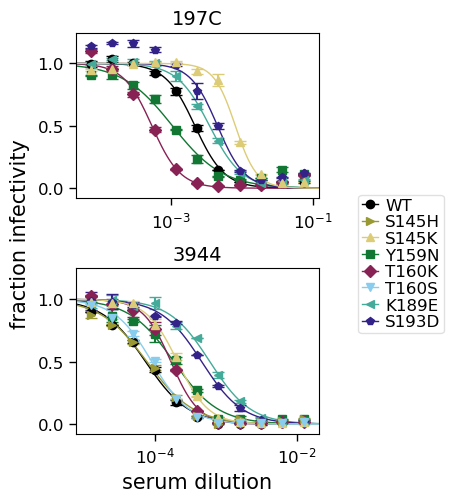

In [36]:
fig1_df = full_neut_df[full_neut_df['serum'].isin(['3944', '197C'])]
fig1_df = fig1_df[fig1_df['virus'].isin(['WT', 'S145K', 'S145H', 'Y159N', 'T160K', 'T160S', 'K189E', 'S193D'])]

virus_colors = {
    'WT': ['black', 'o'],
    'E50K': ['#CC6677', 's'],
    'S145H': ['#999933', '>'],
    'S145K': ['#DDCC77', '^'],
    'Y159N': ['#117733', 's'],
    'T160K': ['#882255', 'D'],
    'T160S': ['#88CCEE', 'v'],
    'T160K-Y159N': ['#BBBBBB', 'o'],
    'K189E': ['#44AA99', '<'],
    'S193D': ['#332288', 'p'],
    'S193Y': ['#AA4499','o'],
}

# fit with neutcurve package
fits = neutcurve.CurveFits(fig1_df)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=8,
                          sharex=False,
                          ncol=1,
                          virus_to_color_marker=virus_colors
                         )    

bbox = matplotlib.transforms.Bbox([[0, 0], [5, 6]])
plt.savefig('fig1_curves.pdf', bbox_inches=bbox)

In [40]:
def get_fold_changes(fits, ic):
    ic_df = fits.fitParams(ics=[ic])

    # Initialize an empty DataFrame to store the results
    fold_changes = pd.DataFrame()

    # Iterate through unique serum names
    for serum_name in ic_df['serum'].unique():
        # Filter data for the current serum
        serum_data = ic_df[ic_df['serum'] == serum_name]

        # Find the 'WT' ICX value for the current serum
        wt_ic = serum_data[serum_data['virus'] == 'WT'][f'ic{ic}'].values[0]

        # Filter out the 'WT' rows for the current serum
        # variant_data = serum_data[serum_data['virus'] != 'WT'].copy()
        variant_data = serum_data[serum_data['virus'] != 'WT'].copy()

        # Calculate log2 fold changes for the current serum
        variant_data[f'log2_fold_change_ic{ic}'] = np.log2(variant_data[f'ic{ic}'] / wt_ic)

        # Append the results to the fold_changes DataFrame
        fold_changes = pd.concat([fold_changes, variant_data[['serum', 'virus', f'log2_fold_change_ic{ic}', ]]])

    # Reset the index of the final DataFrame
    fold_changes = fold_changes.reset_index(drop=True)

    # Rename the 'virus' column to 'variant'
    fold_changes = fold_changes.rename(columns={'virus': 'variant'})
    
    # Remove '_2' from sera with 2 independent runs
    fold_changes['serum'] = fold_changes['serum'].str.replace('_2', '')
    
    return fold_changes

In [41]:
ics = [50, 80, 90]

for ic in ics:
    fold_changes = get_fold_changes(fits, ic)
    
    fold_changes.to_csv(f'ic{ic}_fold_changes.csv', index=False)

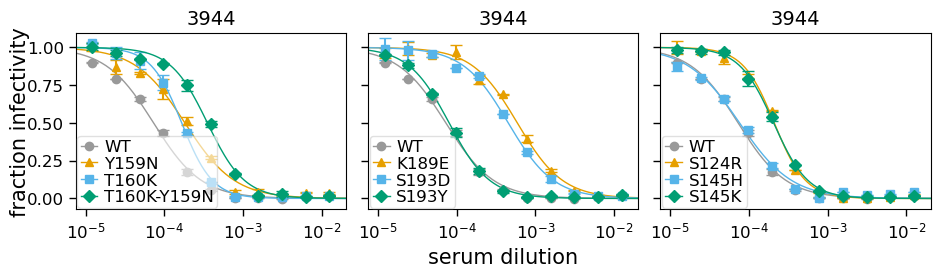

In [48]:
data = pd.read_csv('neut_data/231027_neuts-tidy.csv')
data = data[data['concentration'] > 1e-5]
# data = data[data['

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'K189E', 'S193D', 'S193Y', 'S124R', 'S145H', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=3,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [10, 3.2]])
plt.savefig('231027_3944.pdf', bbox_inches=bbox)

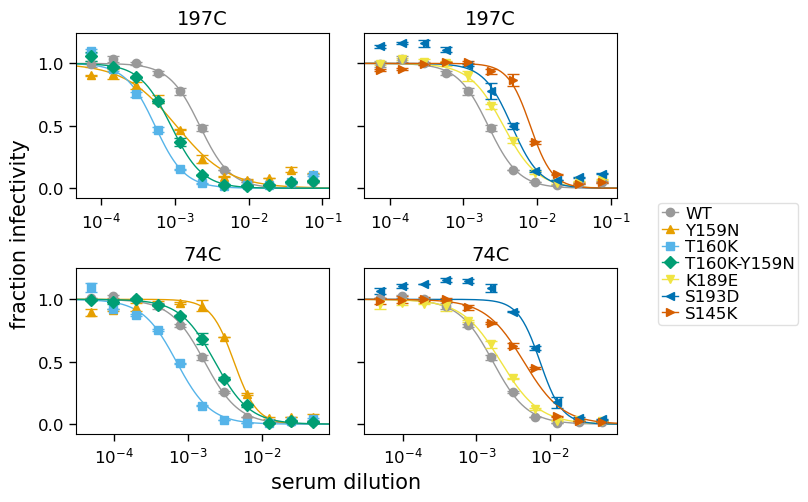

In [6]:
data = pd.read_csv('neut_data/231031_neuts_tidy.csv')

data = data.loc[data['virus'] != 'S124R']

virus_order = ['WT', 'Y159N', 'T160K', 'T160K-Y159N', 'K189E', 'S193D', 'S145K']

data['virus'] = pd.Categorical(data.virus, categories=virus_order, ordered=True)
data.sort_values('virus')

data = data.set_index('virus').loc[virus_order].reset_index()

# fit with neutcurve package
fits = neutcurve.CurveFits(data)

fig, axes = fits.plotSera(xlabel='serum dilution',
                          max_viruses_per_subplot=4,
                          ncol=2,
                          sharex=False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [10, 3.2]])
# plt.savefig('231027_3944.pdf', bbox_inches=bbox)